<a href="https://colab.research.google.com/github/madrigranok/MAT421/blob/main/MadrigranoModuleB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

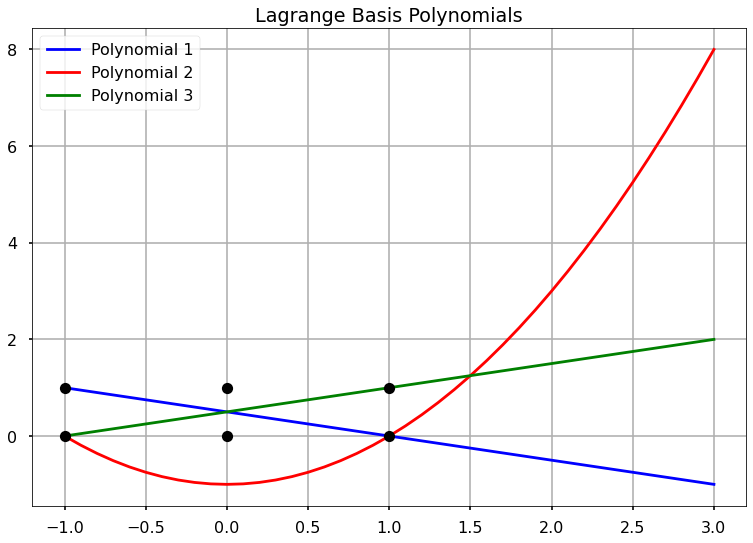

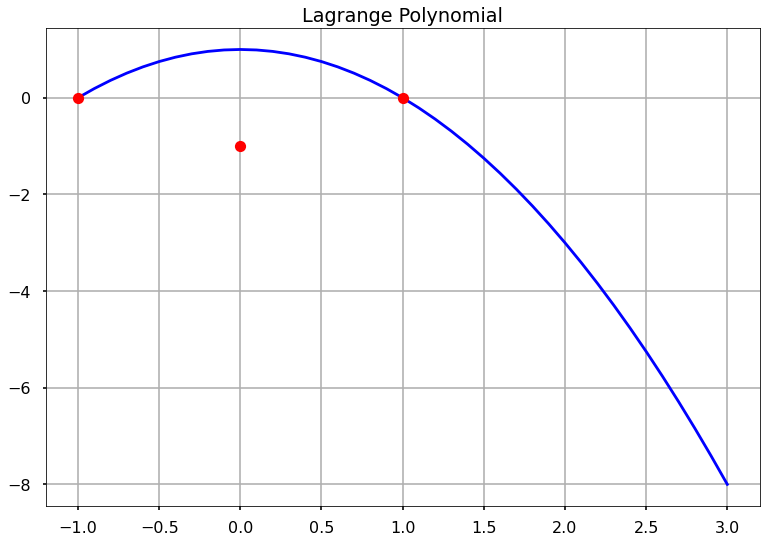

In [4]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

x = [-1, 0, 1];
y = [0, -1, 0];
p1_coeff = [.5, -.5, 0]
p2_coeff = [-1, 0, 1]
p3_coeff = [.5, .5, 0]

P1 = poly.Polynomial(p1_coeff)
P2 = poly.Polynomial(p2_coeff)
P3 = poly.Polynomial(p3_coeff)

xnew = np.arange(-1.0, 3.1, 0.1)  #I dont understand this part of the code, but I'm copying it because the code we were given had it.  I couldn't see where the numbers came from

plt.plot(xnew, P1(xnew), 'b', label = "Polynomial 1")
plt.plot(xnew, P2(xnew), 'r', label = "Polynomial 2")
plt.plot(xnew, P3(xnew), 'g', label = "Polynomial 3")

plt.plot(x, np.ones(len(x)), 'ko', x, np.zeros(len(x)), 'ko')
plt.title("Lagrange Basis Polynomials")
plt.grid()
plt.legend()
plt.show()

L = 0*P1 + -1*P2 + 0*P3 #using the y values I know

plt.plot(xnew, L(xnew), 'b', x, y, 'ro')
plt.title("Lagrange Polynomial")
plt.grid()
plt.show()

I kind of expected this since in my Numerical Analysis 2 class, it also looked like this for less order accurate methods.  To fix this:

P(x) = ((x - xi)(x - xi+1))/((xi-1 - xi)(xi-1 - xi+1))fi-1
      + ((x - xi-1)(x - xi+1))/((xi - xi-1)(xi - xi+1))fi
      + ((x - xi-1)(x - xi))/((xi+1 - xi-1)(xi+1 - xi))fi+1

And when inputing the values, we would get P(x) = x^2 - 1

I personally prefer the Vandermonde method over this method

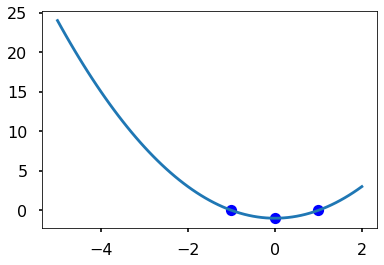

In [9]:
#newton's method now

import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline

def divided_diff(x,y):
  n = len(y)
  coef = np.zeros([n,n])
  coef[:,0] = y
  for j in range(1,n):
    for i in range(n-j):
      coef[i][j] = \
      (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j] - x[i])
  return coef

def newtonpoly(coef, xdata, x):
  n = len(xdata) -1
  p = coef[n]
  for k in range(1, n+1):
    p = coef[n-k] + (x - xdata[n-k])*p
  return p


x = np.array([-1, 0, 1])
y = np.array([0, -1, 0])

a_s = divided_diff(x,y)[0,:]

xnew = np.arange(-5, 2.1, .1)
ynew = newtonpoly(a_s, x, xnew)

plt.plot(x, y, 'bo')
plt.plot(xnew, ynew)